<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Statistic/Workshop_4_Advanced_AI_Statistics_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fermín Méndez García A01703366. Workshop 4

Fuente original del workshop: https://rpubs.com/cdorante/tc3006c_w4


2- Introduction
El modelo de regresión lineal simple sirve para minimizar las desviaciones de los datoas y predecir valores de la variable dependiente a partir de las indeendientes.
Es importante enteder que la regresión lineal no atiende a relaciones NO-LINEALES a menos que se hayan ejecutado las trasformaciones matemáticas corresoponriednets

3- Datos interesantes en la historia:
No abordaremos mucho este apratado. Es la historia de cómo las regresiones lineales se desarrollaron y algunos de los primeros ejemeplos de aplicaciones por los primeros matemáticos en usarla.

4- Tipos de estructuras de datos

Tipos de regresiones


*   Series de tiempo: Corresponden a comportamientos de acuerdo a periosdos de tiempo
*   Cross sectional: Todo se toma en una sola linea de tiempo


*   Panel data: Una mezcla de los dos anteriores.

Cuand hay más de una variables se lec concoe como Modelo de eregresión Múltiplie




5- OLS Analizando la regresión lineal a partir de la estadistica llegamos a conlcusiones como:


*   Si optimizamos la función de MSE para una regresión lieneal simple con derivadas parciales y factorizamos la b1 tenemos que

b1=cov(x,y)/var(x)



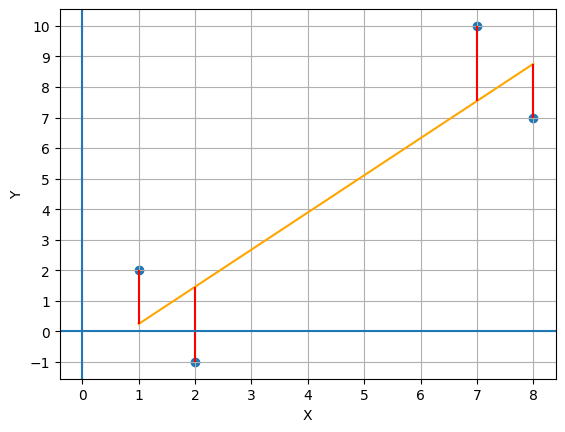

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
df = pd.DataFrame(data)
b1,b0 = np.polyfit(df.x,df.y,1)
df['yhat'] = b0 + b1*df['x']
#plt.clf()
plt.scatter(df.x,df.y)
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

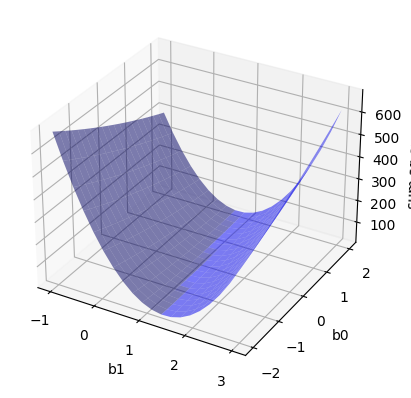

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
# I define a function to get the sum of squared errors given a specific b0 and b1 coefficients:
def sumsqerrors2(b1, b0,df):
    return sum( ( df.y - (b0+b1*df.x)) **2)
# Note that df is a dataframe, so this line of code performs a row-wise operation to avoid
#   writing a loop to sum each squared error for each observation

# Create the plot:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
# I create 20 possible values of beta0 and beta1:
# beta1 will move between -1 and 3
b1s = np.linspace(-1, 3.0, 20)
# beta0 will move between -2 and 2:
b0s = np.linspace(-2, 2, 20)
# I create a grid with all possible combinations of beta0 and beta1 using the meshgrid function:
# M will be all the b1s values, and B the beta0 values:
M, B = np.meshgrid(b1s, b0s)
# I calculate the sum of squared errors with all possible pairs of beta0 and beta1 of the previous grid:
zs = np.array([sumsqerrors2(mp, bp, df)
        for mp, bp in zip(np.ravel(M), np.ravel(B))])
# I reshape the zs (squared errors) from a vector to a grid of the same size as M (20x20)
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('b1')
ax.set_ylabel('b0')
ax.set_zlabel('sum sq.errors')

plt.show()

6. Challenge. Estimate a larket regression model

Now it’s time to use real data to better understand this model. Download monthly prices for Alfa (ALFAA.MX) and the Mexican market index IPCyC (^MXX) from Yahoo Finance from January 2018 to July 2022.

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf


sprices=yf.download(tickers=['ALFAA.MX','^MXX'], start="2019-01-01",interval="1mo")
sprices = sprices['Adj Close']


[*********************100%%**********************]  2 of 2 completed


In [ ]:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

In [ ]:
sr.head()

,ALFAAret,MXXret
Date,,
2019-02-01,-0.092199,-0.026821
2019-03-01,-0.062021,0.010626
2019-04-01,-0.072950,0.029954
2019-05-01,-0.068583,-0.042324
2019-06-01,0.052802,0.009592


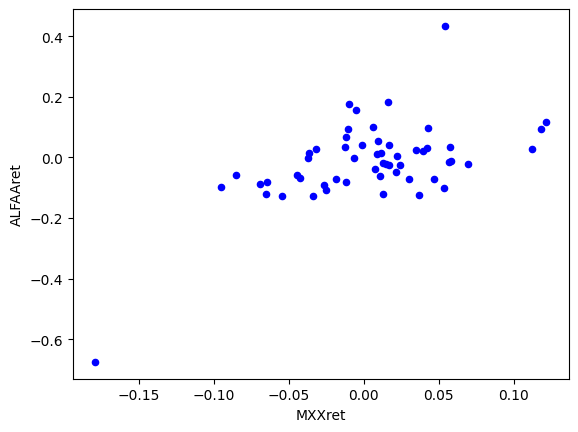

In [ ]:
sr.plot.scatter(y='ALFAAret',x='MXXret',c='Blue')
plt.show()


Como podemos ver las escalas de X y Y varían mucho. Vamos a   graficar con ajuste a las escalas y hacer una regresión lienal simple de los retornos entre ambas empresas

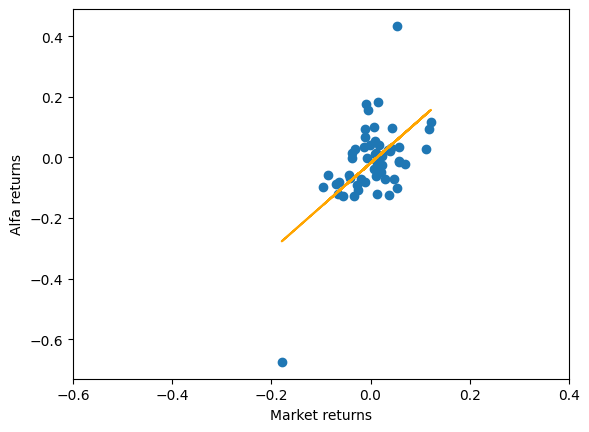

In [ ]:
plt.clf()
x=sr['MXXret']
y = sr['ALFAAret']
plt.scatter(x, y)
# Now I add the regression line:
# The polyfit function actually calculates the beta0 and beta1 of the linear regression line:
b1,b0 = np.polyfit(x,y,1)
# With the beta coefficients I calculated the predicted line (yfit)
yfit = b0+b1*x
plt.plot(x, yfit,c="orange")
# I change the range for X trying to make both axis moving in the same range:
plt.xticks(np.arange(-0.60,0.5,0.2))
# I label the axis:
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

En este caso podemos ver que guardan una relación lineal. Si analizamos el coeficiente beta que indica la pendeinte de la regresión lineal, podemos observar que es mayor que uno. Es decir es más riesgoso.

In [ ]:
import statsmodels.api as sm
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression:
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     25.52
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.54e-06
Time:                        04:45:11   Log-Likelihood:                 43.914
No. Observations:                  55   AIC:                            -83.83
Df Residuals:                      53   BIC:                            -79.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0190      0.015     -1.268      0.2

In [ ]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sr['constant'] = 1
selcols = ['constant','MXXret']
# I set x as a matrix with the column of 1's and the values of X:
x = sr[selcols].values
# I set y as the dependent variable:
y = sr['ALFAAret'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients)
betas = np.matmul(invtxt,xty)
betas

array([-0.01902369,  1.44220241])

A partir de una sola muestra se puede hacer un modelo de regresión lineal y calcular los coeficientes betas para el modelo. Además gracias al limite.

7-Error estándar de los coeficientes de Beta

Así como hemos calculado el error estándar de algunas variables de estudio resulta que los coeficientes tambien tienen su intervalode confianza del 95%


8- Gracias a estas medidas es posible medir en terminos de finanzas el riesgo de los modelos econometricos que tratan de predecir los retornos sobre una empresa con base en el mercado regional.

In [ ]:
# Getting price data and selecting adjusted price columns:
sprices=yf.download(tickers=['ALFAA.MX','^MXX'], start="2010-01-01",interval="1mo")

sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

[*********************100%%**********************]  2 of 2 completed


In [ ]:
from statsmodels.regression.rolling import RollingOLS
x=sm.add_constant(sr['MXXret'])
y = sr['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params
# I check the last pairs of beta values:
betas.tail()

,const,MXXret
Date,,
2023-04-01,-0.001468,0.511303
2023-05-01,-0.008061,0.567690
2023-06-01,-0.010652,0.538511
2023-07-01,-0.009793,0.518701
2023-08-01,-0.011459,0.522069


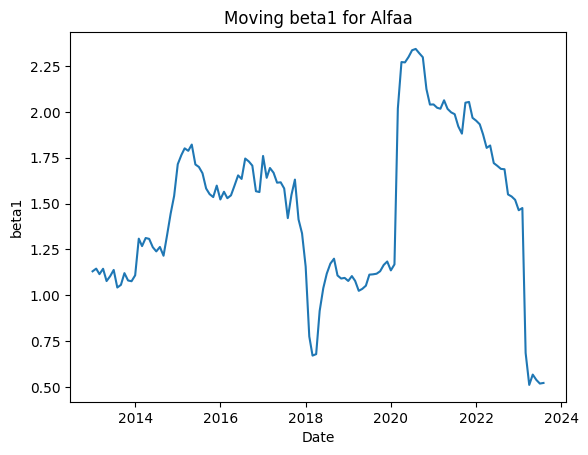

In [ ]:
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.show()

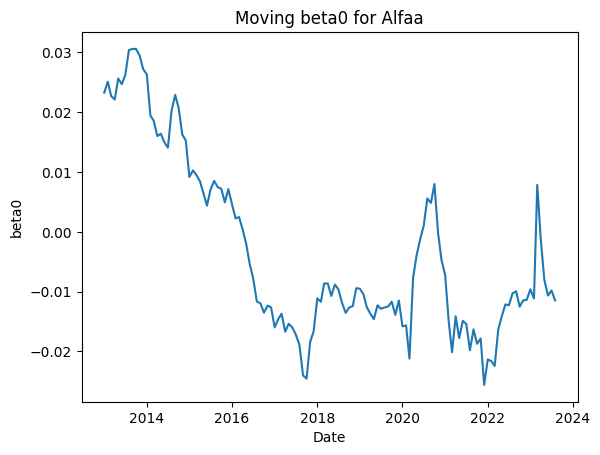

In [ ]:
plt.clf()
plt.plot(betas['const'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.show()

In [ ]:
betas.describe()



,const,MXXret
count,128.000000,128.000000
mean,-0.003208,1.471205
std,0.014985,0.432785
min,-0.025598,0.511303
25%,-0.013744,1.120295
50%,-0.009868,1.537207
75%,0.007282,1.749340
max,0.030594,2.343574


In [ ]:
def print95Interval(df):
    df_stats = df.describe().T

    df_stats["min95"] = df_stats["mean"] - 2 * (df_stats["std"] / (df_stats["count"] ** 0.5))
    df_stats["max95"] = df_stats["mean"] + 2 * (df_stats["std"] / (df_stats["count"] ** 0.5))

    for column in df_stats.index:
        min95 = df_stats.loc[column, "min95"]
        max95 = df_stats.loc[column, "max95"]
        print(f"The 95% confidence interval of the variable '{column}' is {min95:.4f}, {max95:.4f}")

print95Interval(betas)




The 95% confidence interval of the variable 'const' is -0.0059, -0.0006
The 95% confidence interval of the variable 'MXXret' is 1.3947, 1.5477


9 t-Statistic, p-value and 95% confidence interval of beta coefficients


Con todo lo analizado anteriormente tenemos que algunas pruebas de hipótesis relevantes para el estudio de los retornos de una acción en finanzas son:
Evaluar si b0 es mayor que 0: Esto significa que tiene retornos mayores al mercado
Evaluar si b1 es mayor que 0: Es decir se comporta acorde al mercado, si el mercado gana, gana; si el mercado pierde, pierde.
Evaluar si b1 es mayor que 1: Si esto es cierto, entonces la variable es más riesgosa que el mervado mismo.